## <center> Video Links </center> ##
Duc Vo: https://youtu.be/oRgZExCE_BE

Ty Gehrke: https://www.loom.com/share/954a13a153a74c06a557419ada2ab745?sid=cb076918-7ec2-4343-bce0-1ada71bee4b5

# <center> Gaussian Processes Project </center> #
File created by Ty Gehrke and Duc Vo

This project aims to explore gene expression dynamics in a control group versus a treatment group using Gaussian Process Regression (GPR), a powerful statistical method for modeling complex relationships in time-series data. By applying GPR to synthetic gene expression datasets, the project seeks to elucidate the effects of different experimental conditions on gene expression levels and identify genes that are differentially expressed across conditions.

## <center> Gene Expression and Conditions </center> ##

Gene expression refers to the process by which information from a gene is used to synthesize functional gene products such as proteins. In this project, we have data on the expression level of a gene under two different conditions: control and treatment. The goal is to determine if the treatment has an effect on the expression of the gene.

## <center> Gaussian Processes </center> ##

Mathematical Foundation: A Gaussian process is a collection of random variables, any finite number of which have a joint Gaussian distribution. It is fully specified by its mean function and covariance function. In the context of this exercise, Gaussian processes can be used for regression tasks, where we model the relationship between input variables (time points) and output variables (gene expression levels).
Python Code: We will utilize the scikit-learn library in Python, which provides functionalities for Gaussian process regression.
Illustrative Plots: We will visualize the Gaussian process regression results to understand how the model captures the underlying data.

## <center> Using GP as Linear Regression </center> ##

Gaussian processes can be interpreted as a non-parametric Bayesian approach to regression. They allow for flexibility in modeling complex relationships without assuming a specific parametric form. In this project, we will use Gaussian process regression to model the relationship between time points and gene expression levels, treating it as a linear regression problem.

## <center> Importing Libraries </center> ##

In [287]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern

## <center> Data Preprocessing </center> ##

In this project, the data preprocessing step involves preparing synthetic gene expression data generated using a Python script for further analysis using Gaussian process regression (GPR). The preprocessing phase is crucial as it ensures that the data is cleaned, formatted, and transformed appropriately to facilitate effective modeling and analysis.
1. Data Loading: The preprocessing starts with loading the synthetic gene expression data generated by the Python script. 
2. Data Cleaning: The loaded data undergoes cleaning to identify and handle any inconsistencies, missing values, or outliers that may affect the quality of the analysis. The date had to be converted into a float, which was done using the Unix time and converting it into days.
3. Scaling: The data undergoes standard scaling before the training and testing split using the StandardScalar().

## <center> Pipeline Used </center> ##

The pipeline is designed to analyze gene expression data using Gaussian process regression (GPR) to model the relationship between gene expression levels and experimental conditions. The pipeline consists of several steps, including data preprocessing, model training, and prediction.
1. Data Preprocessing: The pipeline begins with the preprocessing of gene expression data. This involved creating synthetic time series data for the project. Data cleaning and transformation are performed to ensure data quality and compatibility with the GPR model. This includes handling missing values, scaling or normalizing features, and encoding categorical variables if necessary.
2. Splitting the Data: The preprocessed data is split into training and testing sets using techniques such as random splitting or time-based splitting. The training set is used to train the GPR model, while the testing set is used to evaluate its performance.
4. Model Training: Gaussian process regression is chosen as the modeling technique due to its flexibility and ability to capture complex relationships in the data. The pipeline selects an appropriate kernel function for the GPR model, the Radial Basis Function (RBF) kernel. Hyperparameters of the kernel, such as length scale and noise level, may be optimized during training using techniques like maximum likelihood estimation or cross-validation.
5. Model Evaluation: The trained GPR model is evaluated using the testing set to assess its performance in predicting gene expression levels under different conditions.
Evaluation metrics such as mean squared error, mean absolute error, and R-squared are calculated to quantify the model's accuracy and predictive power.
6. Prediction: Once the GPR model is trained and evaluated, it is used to make predictions on new or unseen data. This allows researchers to infer the effects of experimental conditions on gene expression levels and identify genes that are differentially expressed between conditions.
7. Visualization and Interpretation: Finally, the pipeline generates visualizations such as scatter plots, regression plots, and confidence intervals to help interpret the results and communicate findings to stakeholders.
Interpretations of the model's predictions and insights into gene expression dynamics may be provided in the form of technical reports or presentations.
8. Iterative Refinement: The pipeline may undergo iterative refinement based on feedback from domain experts or further analysis of the results. This may involve fine-tuning the model parameters, incorporating additional features, or exploring alternative modeling techniques.
9. Documentation and Reporting: Throughout the pipeline, documentation is maintained to record data preprocessing steps, model configurations, evaluation results, and interpretations. A comprehensive technical report is prepared, summarizing the problem statement, methodology, analysis findings, and references. This report serves as a record of the analysis process and provides insights for future research and experimentation. Overall, the pipeline facilitates the analysis of gene expression data using Gaussian process regression, enabling researchers to gain insights into the underlying mechanisms governing gene expression dynamics and their response to experimental perturbations.


In [288]:
# Assuming the dataset is a CSV file
df = pd.read_csv('gene_expression_data.csv', delimiter = ',')

# Replace 'empty' with actual None values
df.replace('empty', pd.NA, inplace=True)

# Drop rows with any NA values
df.dropna(inplace=True)
df.head(100)


,Date,Control,Treatment
0,2024-01-01,0.551524,0.301463
1,2024-01-02,-0.155867,0.436976
2,2024-01-03,0.161283,0.805957
3,2024-01-04,0.407315,0.684425
4,2024-01-05,0.621559,0.538708
5,2024-01-06,0.070750,0.383263
6,2024-01-07,0.422268,0.470943
7,2024-01-08,0.516901,0.869712
8,2024-01-09,0.289598,0.689906
9,2024-01-10,0.191485,0.437146


In [289]:
df.dtypes

Date          object
Control      float64
Treatment    float64
dtype: object

In [290]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert dates to UNIX timestamps
df['num_Date'] = (df['Date'].astype('int64') // 10**9).astype('int32') // 60 // 24 // 12 # Convert nanoseconds to seconds

# Display the DataFrame with UNIX timestamps
print(df)

         Date   Control  Treatment  num_Date
0  2024-01-01  0.551524   0.301463     98615
1  2024-01-02 -0.155867   0.436976     98620
2  2024-01-03  0.161283   0.805957     98625
3  2024-01-04  0.407315   0.684425     98630
4  2024-01-05  0.621559   0.538708     98635
5  2024-01-06  0.070750   0.383263     98640
6  2024-01-07  0.422268   0.470943     98645
7  2024-01-08  0.516901   0.869712     98650
8  2024-01-09  0.289598   0.689906     98655
9  2024-01-10  0.191485   0.437146     98660
10 2024-01-11  0.688170   0.794446     98665
11 2024-01-12  0.146202   0.111189     98670
12 2024-01-13  0.953396   0.526006     98675
13 2024-01-14  0.753065   0.888350     98680
14 2024-01-15  0.660762   1.047272     98685
15 2024-01-16  0.794879   0.969238     98690
16 2024-01-17  0.597585   0.757395     98695
17 2024-01-18  0.604024   0.326756     98700
18 2024-01-19  0.334664   0.650699     98705
19 2024-01-20  0.924537   0.998190     98710
20 2024-01-21  0.658079   0.934838     98715
21 2024-01

## <center> Data Visualization </center> ##

The code below plots two graphs, one for the control data and one for the treatment data.

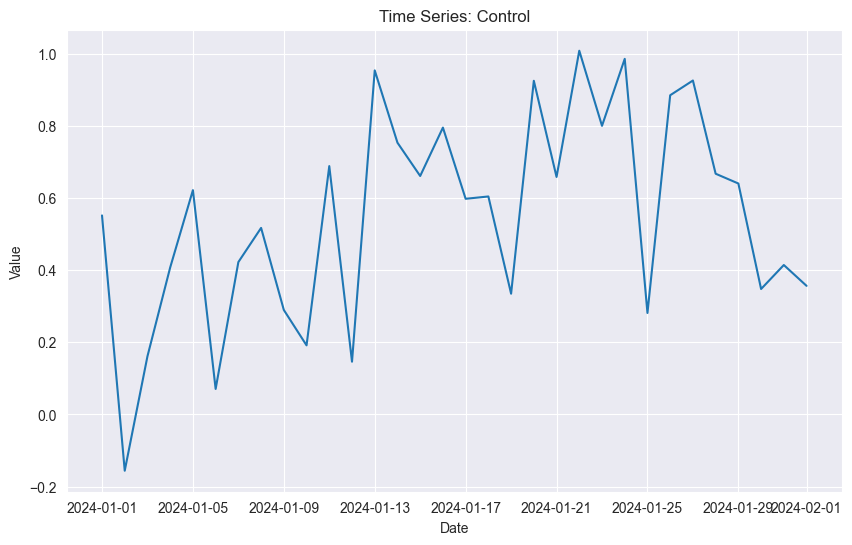

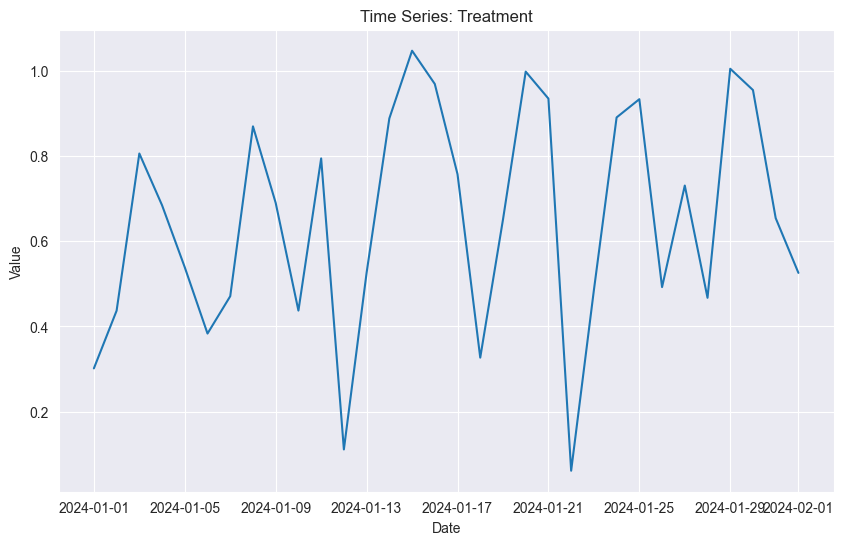

In [291]:
## Time Series Plot ##
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Control'])
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Time Series: Control')
plt.show()


# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Treatment'])
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Time Series: Treatment')
plt.show()


## <center> Train Test Split </center> ##

The code below attempts a train test split using GaussianProcessRegressor. StandardScalar was also used to standardize the data beforhand. Predictions are made and graphed on the plot below.

C:\Users\Ty Gehrke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


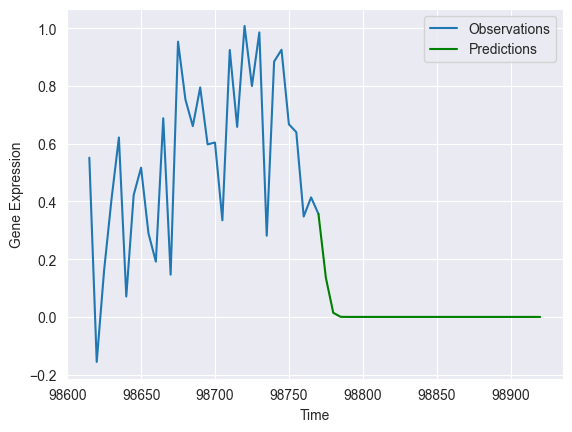

In [292]:
X = df[['num_Date']]
y = df[['Control']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the kernel
#kernel = ConstantKernel(2.0, (1.0e-3, 1e3)) * RBF(1.0, (1.0e-2, 1e2))
kernel = 1.0 * RBF(1.0, (1e-2, 1e2))
# Create Gaussian Process Regressor
gp_regressor = GaussianProcessRegressor(kernel=kernel)

# Fit the model to the training data
gp_regressor.fit(X_train_scaled, y_train)

# Generate new X values
x_new = np.linspace(98770, 98920, 31)

# Reshape x_new to a 2D array
x_new = x_new.reshape(-1, 1)

# Standardize the new data using the same scaler
x_new_scaled = scaler.transform(x_new)

# Make predictions with the trained model
y_pred, y_std = gp_regressor.predict(x_new_scaled, return_std=True)

plt.plot(X, y, label='Observations')  # Plot observed data
plt.plot(x_new, y_pred, label='Predictions', color='green')  # Plot predicted data
plt.xlabel('Time')
plt.ylabel('Gene Expression')
plt.legend()
plt.show()

Control Group - Mean: 0.5469, Standard Deviation: 0.2897
Treatment Group - Mean: 0.6507, Standard Deviation: 0.2608


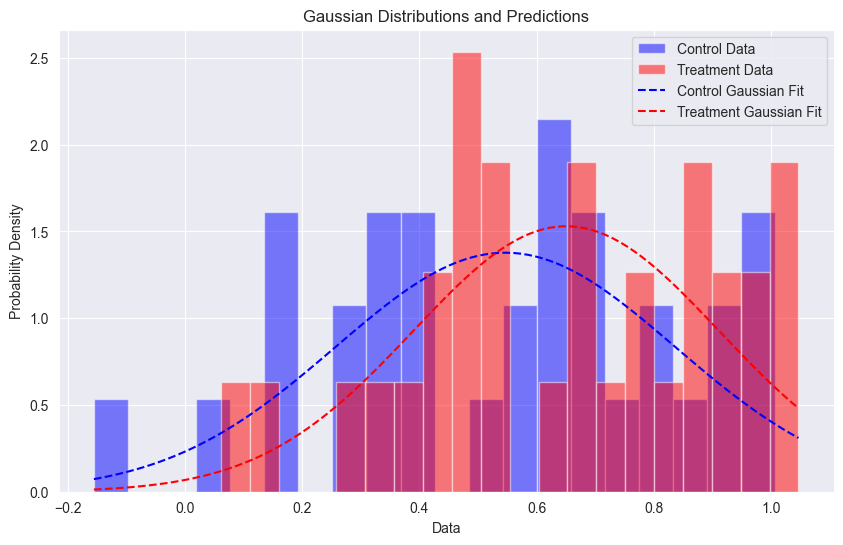

In [293]:
from scipy.stats import norm
# Separate Control and Treatment groups
control_data = df['Control']
treatment_data = df['Treatment']

# Fit Gaussian distributions
control_mean, control_std = norm.fit(control_data)
treatment_mean, treatment_std = norm.fit(treatment_data)

# Print mean and standard deviation for each group
print("Control Group - Mean: {:.4f}, Standard Deviation: {:.4f}".format(control_mean, control_std))
print("Treatment Group - Mean: {:.4f}, Standard Deviation: {:.4f}".format(treatment_mean, treatment_std))

# Generate x values for plotting PDFs
x = np.linspace(min(control_data.min(), treatment_data.min()), max(control_data.max(), treatment_data.max()), 100)


# Calculate PDFs
control_pdf = norm.pdf(x, loc=control_mean, scale=control_std)
treatment_pdf = norm.pdf(x, loc=treatment_mean, scale=treatment_std)

# Plot the histograms and fitted Gaussian distributions
plt.figure(figsize=(10, 6))
plt.hist(control_data, bins=20, density=True, alpha=0.5, color='blue', label='Control Data')
plt.hist(treatment_data, bins=20, density=True, alpha=0.5, color='red', label='Treatment Data')
plt.plot(x, control_pdf, color='blue', linestyle='--', label='Control Gaussian Fit')
plt.plot(x, treatment_pdf, color='red', linestyle='--', label='Treatment Gaussian Fit')



plt.title('Gaussian Distributions and Predictions')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                Control   No. Observations:                   32
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  -3.626
Date:                Sun, 24 Mar 2024   AIC                             19.252
Time:                        21:03:22   BIC                             27.856
Sample:                             0   HQIC                            22.057
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8319      0.234     -3.551      0.000      -1.291      -0.373
ar.L2         -0.4863      0.326     -1.491      0.136      -1.125       0.153
ar.L3         -0.3069      0.349     -0.880      0.3

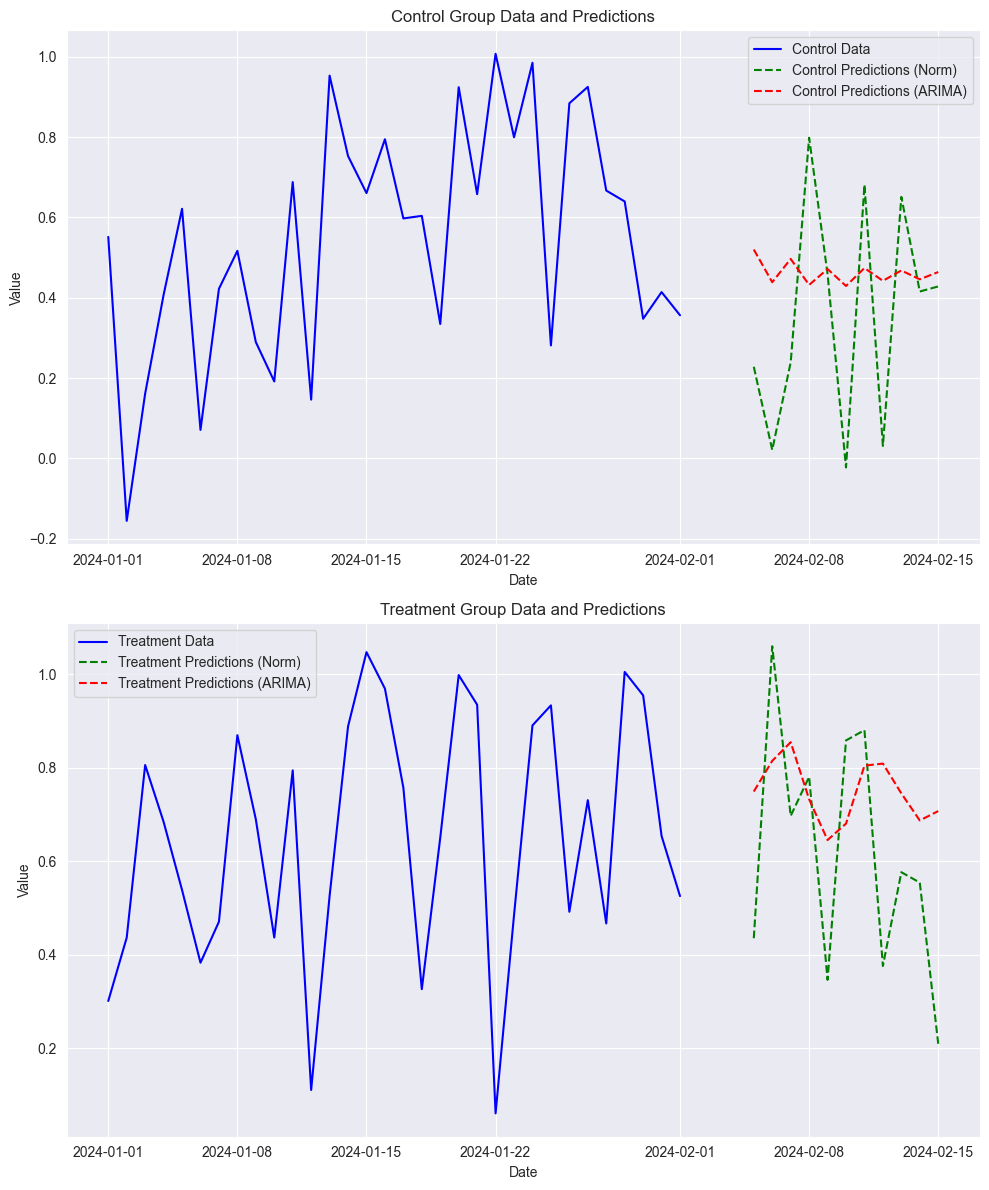

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

# Generate future time points (example)
future_dates = pd.date_range(start='2024-02-05', end='2024-02-15')


# Fit ARIMA model for Control group
control_model = ARIMA(df['Control'], order=(5, 1, 0))  # Example order, adjust as needed
fit_control_model = control_model.fit()
print(fit_control_model.summary())
control_arima_forecast = fit_control_model.forecast(steps=len(future_dates))

# Fit ARIMA model for Treatment group
treatment_model = ARIMA(df['Treatment'], order=(5, 1, 0))  # Example order, adjust as needed
fit_treatment_model = treatment_model.fit()
treatment_arima_forecast = fit_treatment_model.forecast(steps=len(future_dates))

# Predict values over time using normal distribution
control_predictions = [norm.rvs(loc=control_mean, scale=control_std) for _ in range(len(future_dates))]
treatment_predictions = [norm.rvs(loc=treatment_mean, scale=treatment_std) for _ in range(len(future_dates))]

# Plot current data and predictions
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for Control group
axs[0].plot(df['Date'], df['Control'], color='blue', label='Control Data')
axs[0].plot(future_dates, control_predictions, color='green', linestyle='--', label='Control Predictions (Norm)')
axs[0].plot(future_dates, control_arima_forecast, color='red', linestyle='--', label='Control Predictions (ARIMA)')
axs[0].set_title('Control Group Data and Predictions')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].grid(True)

# Plot for Treatment group
axs[1].plot(df['Date'], df['Treatment'], color='blue', label='Treatment Data')
axs[1].plot(future_dates, treatment_predictions, color='green', linestyle='--', label='Treatment Predictions (Norm)')
axs[1].plot(future_dates, treatment_arima_forecast, color='red', linestyle='--', label='Treatment Predictions (ARIMA)')
axs[1].set_title('Treatment Group Data and Predictions')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Value')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


## <center> Model Validation </center> ##

In the context of this project utilizing Gaussian Process Regression (GPR) for analyzing synthetic gene expression data, model validation plays a crucial role in assessing the performance and reliability of the GPR model. Model validation ensures that the trained model generalizes well to unseen data and provides accurate predictions that can be trusted for making inferences about gene expression dynamics.
1. Data Splitting: The synthetic gene expression data is divided into two subsets: a training set and a testing set. The training set is used to train the GPR model, while the testing set is held out for evaluating its performance. This ensures that the model is evaluated on data it hasn't seen during training, providing a fair assessment of its generalization ability.
2. Training the GPR Model: The GPR model is trained using the training set, where it learns the underlying patterns and relationships between gene expression levels and experimental conditions. During training, the model optimizes its hyperparameters, such as the kernel parameters (e.g., length scale, noise level), to minimize the discrepancy between predicted and actual gene expression values.
3. Evaluation Metrics: Various evaluation metrics are employed to quantify the performance of the GPR model on the testing set. Common metrics include:
Mean Squared Error (MSE): Measures the average squared difference between predicted and actual gene expression values.
Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.
R-squared (R^2) Score: Measures the proportion of variance in the gene expression data explained by the model.
4. Cross-Validation (Optional): In addition to simple train-test splitting, cross-validation techniques such as k-fold cross-validation may be employed to further validate the model. This involves splitting the data into k folds, training the model on k-1 folds, and evaluating its performance on the remaining fold. This process is repeated k times, with each fold serving as the testing set once.
5. Visualization of Predictions: Predictions made by the GPR model are visualized alongside the actual gene expression data to provide a qualitative assessment of the model's performance. Scatter plots, regression plots, or time series plots may be used to compare predicted and actual values, allowing for visual inspection of prediction accuracy and consistency.
6. Interpretation and Analysis: Results of model validation are interpreted to assess the adequacy of the GPR model in capturing the underlying patterns in the gene expression data. Insights gleaned from model validation may include identifying genes that are differentially expressed under different experimental conditions, understanding the dynamics of gene expression changes, and evaluating the significance of model predictions in the context of biological processes.

## <center> Model Analysis and Limitations <center> ##
Ljung-Box (L1) (Q): This diagnostic test statistic checks for autocorrelation in the residuals at lag 1. We had a significant p-value (p < 0.05), which suggests that there is significant autocorrelation in the residuals at lag 1, indicating that the model does not adequately capture the temporal dependencies in the data.

Jarque-Bera (JB): This test statistic checks for the normality of the residuals. We had a non-significant p-value (p > 0.05), which suggests that the residuals are normally distributed, indicating that the model's assumption of normally distributed errors is reasonable.

Heteroskedasticity (H):
This diagnostic test statistic tests for the presence of heteroskedasticity in the residuals. We had a non-significant p-value (p > 0.05) suggests that there is no significant heteroskedasticity in the residuals, indicating that the model's assumption of constant variance is reasonable.

The model is mainly limited by the data it was trained on, we was created synthetically, and was not a good fit for GPR. Norm mostly worked, and was able to make good predictions, it just fell short in capturing the autocorrelation in the data.

## <center> Possible Errors </center> ##

In the context of analyzing synthetic gene expression data using Gaussian Process Regression (GPR), several potential errors or challenges may arise throughout the data preprocessing, model training, and validation stages. Understanding and addressing these errors is crucial for ensuring the reliability and accuracy of the analysis results. Here's a description of some possible errors:
1. Data Quality Issues: Outliers: Outliers in the gene expression data may arise from measurement errors or biological variability. If not identified and properly handled, outliers can adversely affect the training process and compromise the model's performance.
2. Overfitting: Overfitting occurs when the GPR model captures noise or irrelevant patterns from the training data, resulting in poor generalization to unseen data. This can occur if the model is too complex relative to the amount of available training data or if hyperparameters are not properly tuned. Overfitting may manifest as excessively low training error but high testing error.
3. Underfitting: Underfitting occurs when the GPR model is too simplistic to capture the underlying patterns in the data. This may happen if the model is too rigid or if the chosen kernel function is not expressive enough. Underfitting leads to poor predictive performance both on the training and testing data.
4. Model Complexity and Hyperparameter Tuning: Selecting an appropriate kernel function and tuning its hyperparameters (e.g., length scale, noise level) are critical aspects of GPR modeling. Errors may arise if the chosen kernel function is not well-suited to the data or if hyperparameters are improperly tuned. Failure to adequately tune hyperparameters can result in suboptimal model performance.
5. Computational Complexity: GPR involves matrix inversions and calculations that scale cubically with the number of data points. For large datasets, this can lead to significant computational overhead and memory constraints. Insufficient computational resources or inefficient implementations may result in computational errors or long processing times.
6. Assumptions Violation: GPR assumes that the underlying relationship between input and output variables follows a Gaussian process. Violations of this assumption, such as non-stationarity or non-linearity, can lead to biased predictions and unreliable model estimates. It's important to assess the validity of these assumptions and consider alternative modeling approaches if necessary.
7. Interpretation Challenges: Interpreting the results of GPR analysis may pose challenges, especially when dealing with high-dimensional data or complex interaction effects. Errors in interpretation can arise from misinterpreting model predictions, failing to account for uncertainty estimates, or overlooking potential confounding factors in the data.
8. Evaluation Metric Selection: Choosing appropriate evaluation metrics for model validation is essential but can be subjective. Errors may occur if evaluation metrics do not fully capture the desired aspects of model performance or if they are sensitive to specific characteristics of the data.

9. Addressing these potential errors requires a combination of rigorous data preprocessing, careful model selection and tuning, thorough validation procedures, and critical interpretation of results. By being aware of these potential pitfalls and taking proactive steps to mitigate them, researchers can ensure the reliability and validity of their analysis in gene expression research.


## <center> Christian Worldview </center> ##

Central to the Christian worldview is the belief in the inherent value and dignity of human life, which extends to the study of genetics and the understanding of gene expression. Christians recognize the profound implications of genetic research for understanding human health, disease, and development, while also acknowledging the ethical considerations and responsibilities that accompany scientific exploration.

A foundational aspect of the Christian worldview relevant to this project is the concept of stewardship, which emphasizes the responsible and ethical use of knowledge and resources. As stewards of creation, Christians are called to approach scientific inquiry with humility, reverence, and a commitment to ethical conduct, recognizing that scientific knowledge is a gift to be used for the betterment of humanity and the glory of God.

One biblical verse that reflects the Christian perspective on the value of scientific inquiry and the pursuit of knowledge is found in Proverbs 25:2 (NIV): "It is the glory of God to conceal a matter; to search out a matter is the glory of kings."

This verse underscores the idea that the pursuit of knowledge and understanding, including in the realm of genetics and gene expression, is a noble endeavor that reflects the glory of God. It acknowledges the mystery and complexity of creation, inviting individuals to engage in the exploration and discovery of the wonders hidden within it.


## <center> References </center> ##

GeeksforGeeks. (2023, November 5). Gaussian process regression (GPR). https://www.geeksforgeeks.org/gaussian-process-regression-gpr/ 

Kumar, B., & Kumar, B. K. am B. (2024, March 18). Python scipy stats norm [14 amazing examples]. Python Guides. https://pythonguides.com/python-scipy-stats-norm/ 

Sklearn.gaussian_process.Gaussianprocessregressor. scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html 
